In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import seaborn as sns
from tensorflow import keras

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
train_X=r'D:/tarbiat class/ANN/xray_dataset_covid19/train'
test_X=r'D:/tarbiat class/ANN\xray_dataset_covid19/test'


In [23]:
import os
classes_train=os.listdir(train_X)
classes_test=os.listdir(test_X)

In [24]:
print(classes_train)

['NORMAL', 'PNEUMONIA']


In [25]:
print(classes_test)

['NORMAL', 'PNEUMONIA']


In [8]:
from keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import preprocess_input

import ssl
ssl._create_default_https_context = ssl._create_unverified_context
base_model = VGG19(weights = 'C:/Users/saeed/Downloads/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5', 
                 include_top = False, 
                 input_shape = (224,224,3) )
base_model.trainable = False

In [9]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                 restore_best_weights=True)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization,AveragePooling2D

In [106]:
from keras.models import Model
headmodel = base_model.output
headmodel = Flatten()(headmodel)
headmodel = Dense(units=64, activation='relu')(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(units=2, activation='sigmoid')(headmodel)
model = Model(inputs = base_model.input , outputs = headmodel)


In [104]:
train_datagen = ImageDataGenerator(zoom_range=0.2,
    horizontal_flip=True,
    rescale=1.0/255.0, 
    shear_range=0.2 )
training_set = train_datagen.flow_from_directory(train_X,
                                                target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 148 images belonging to 2 classes.


In [105]:
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_set = test_datagen.flow_from_directory(test_X,
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 40 images belonging to 2 classes.


In [107]:
from tensorflow.keras.optimizers import Adam
opt_1 = Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) 
history = model.fit(training_set,
                              validation_data=test_set,
                              epochs=10, )

Epoch 1/10
5/5 [==============================] - 345s 71s/step - loss: 1.5546 - accuracy: 0.5541 - val_loss: 0.4834 - val_accuracy: 0.8750
Epoch 2/10
5/5 [==============================] - 356s 74s/step - loss: 0.5157 - accuracy: 0.7635 - val_loss: 0.3442 - val_accuracy: 0.9500
Epoch 3/10
5/5 [==============================] - 339s 70s/step - loss: 0.3524 - accuracy: 0.9189 - val_loss: 0.2274 - val_accuracy: 0.9000
Epoch 4/10
5/5 [==============================] - 344s 71s/step - loss: 0.2982 - accuracy: 0.9257 - val_loss: 0.1947 - val_accuracy: 0.9500
Epoch 5/10
5/5 [==============================] - 339s 70s/step - loss: 0.2312 - accuracy: 0.9189 - val_loss: 0.1570 - val_accuracy: 0.9500
Epoch 6/10
5/5 [==============================] - 339s 75s/step - loss: 0.2538 - accuracy: 0.9189 - val_loss: 0.1413 - val_accuracy: 0.9750
Epoch 7/10
5/5 [==============================] - 337s 70s/step - loss: 0.2281 - accuracy: 0.9257 - val_loss: 0.1653 - val_accuracy: 0.9500
Epoch 8/10
5/5 [====

In [96]:
real = test_set.classes
real

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

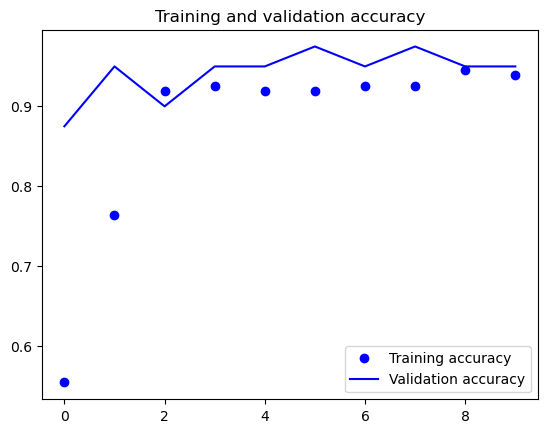

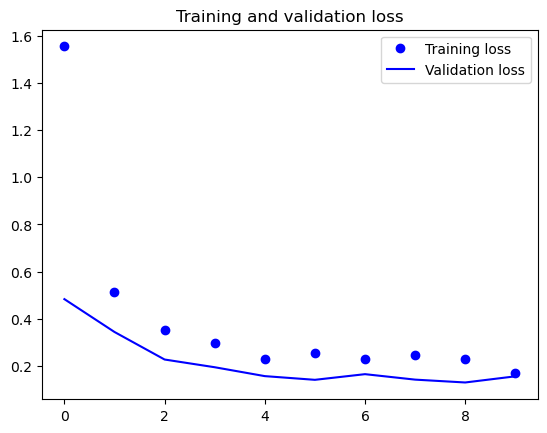

In [116]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [143]:
predict = model.predict(test_set)
predict_1 = np.argmax(predict, axis=1,out=None)
fpr, tpr, thresholds = roc_curve(real, predict_1)
from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

2/2 [==============================] - 73s 14s/step
Area under curve, AUC =  0.5


1/1 [==============================] - 2s 2s/step
prediction class:  [1]


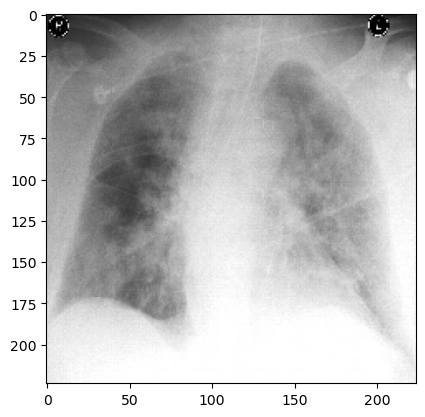

In [141]:
class_dict = {0:'Normal',
              1:'Pneumonia'}
import cv2
file_path =  'D:/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg'
test_image = cv2.imread(file_path)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_CUBIC)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs , axis=1)


print('prediction class: ',pred_class)

2/2 [==============================] - 75s 17s/step
AxesSubplot(0.1675,0.11;0.5775x0.77)
report :               precision    recall  f1-score   support

           0       0.56      0.50      0.53        20
           1       0.55      0.60      0.57        20

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.55      0.55      0.55        40



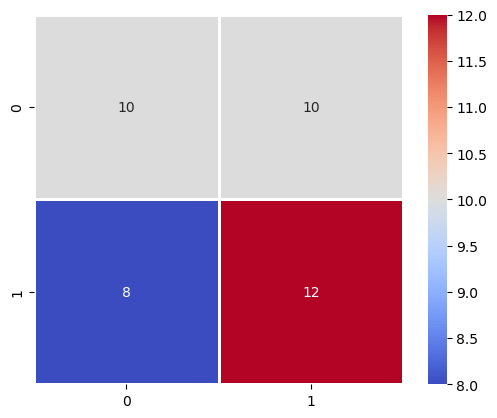

In [115]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve
predict = model.predict(test_set)
predict_1 = np.argmax(predict, axis=1,out=None)
con = confusion_matrix(real,predict_1)
print(sns.heatmap(con,cmap="coolwarm" ,annot=True,fmt="d",linewidths=1 ,square= True))
print('report :',classification_report(real,predict_1))